In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter

In [8]:
datasets = os.walk('./test_results').__next__()[1]

df = pd.DataFrame(columns=['dataset', 'exp_type', 'num_labeled', 'test_loss', 'test_acc', 'test_ece'])
for dataset in datasets:
    exp_types = os.walk('./test_results/' + dataset).__next__()[1]
    for exp_type in exp_types:
        metrics = pd.read_csv(f'./test_results/{dataset}/{exp_type}/test_metrics.csv')
        for num_labeled in metrics['num_labeled']:
            test_loss = metrics[metrics['num_labeled'] == num_labeled]['test_loss'].values[0]
            test_acc = metrics[metrics['num_labeled'] == num_labeled]['test_acc'].values[0]
            test_ece = metrics[metrics['num_labeled'] == num_labeled]['test_ece'].values[0]

            df.loc[len(df)] = {'dataset': dataset, 'exp_type': exp_type, 'num_labeled': num_labeled, 'test_loss': test_loss, 'test_acc': test_acc, 'test_ece': test_ece}

In [9]:
df

,dataset,exp_type,num_labeled,test_loss,test_acc,test_ece
0,dermamnist,baseline-softmax,4000,1.297896,0.770075,0.177701
1,dermamnist,active-jempp,250,2.335894,0.654863,0.280365
2,dermamnist,active-jempp,500,2.063237,0.696758,0.241723
3,dermamnist,active-jempp,750,1.959951,0.720200,0.230853
4,dermamnist,active-jempp,1000,1.884057,0.717207,0.227887
...,...,...,...,...,...,...
198,organcmnist,active-jempp,3000,0.273185,0.920156,0.023053
199,organcmnist,active-jempp,3250,0.308012,0.916018,0.033217
200,organcmnist,active-jempp,3500,0.311564,0.909202,0.022668
201,organcmnist,active-jempp,3750,0.259834,0.919060,0.020477


Saving dermamnist
Saving pneumoniamnist
Saving cifar10
Saving organsmnist
Saving bloodmnist
Saving organcmnist


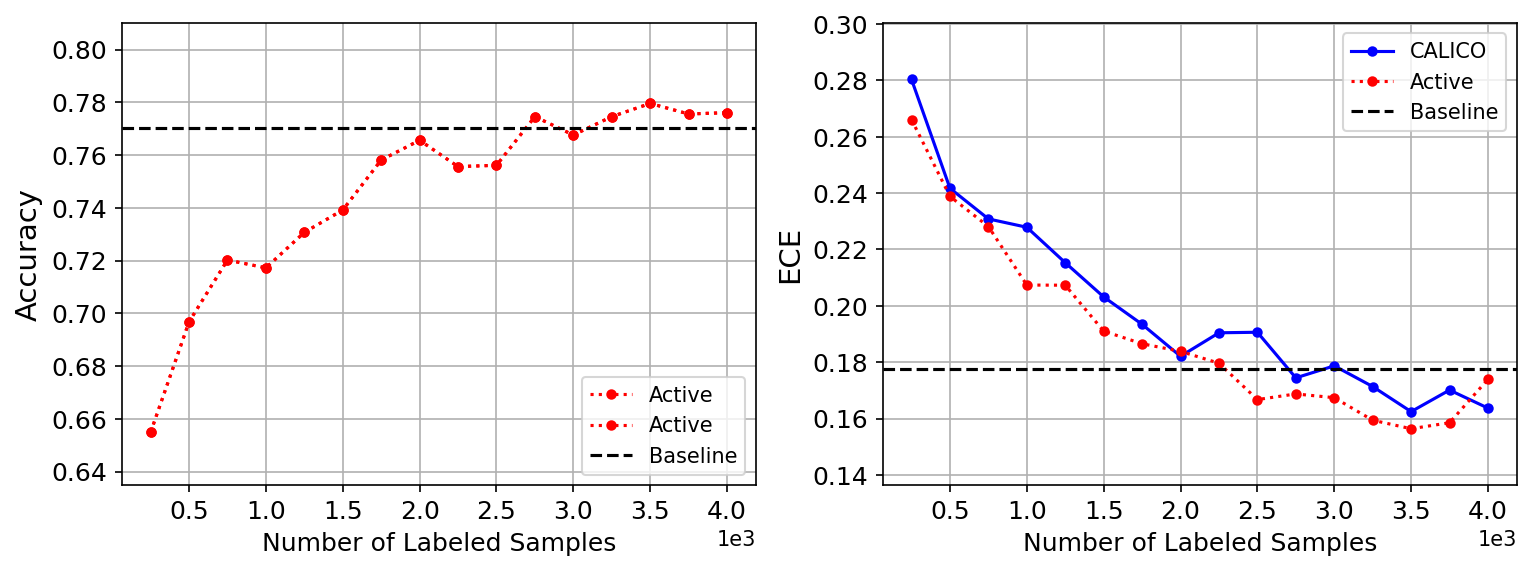

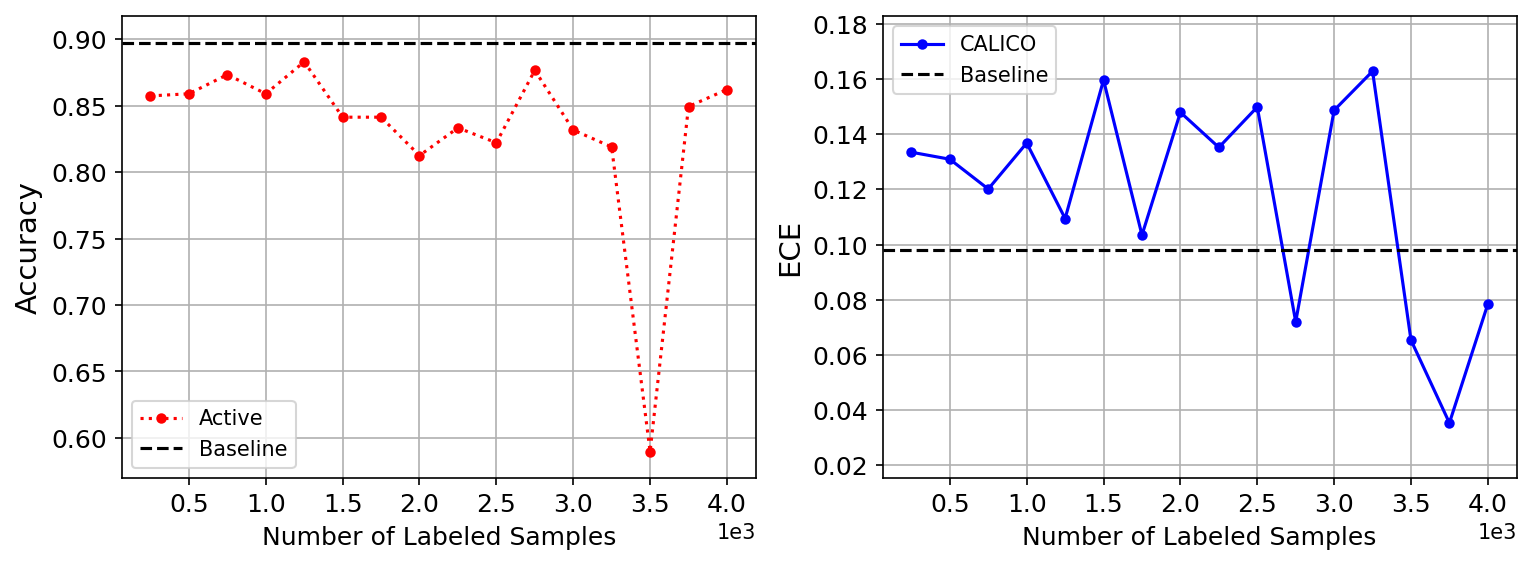

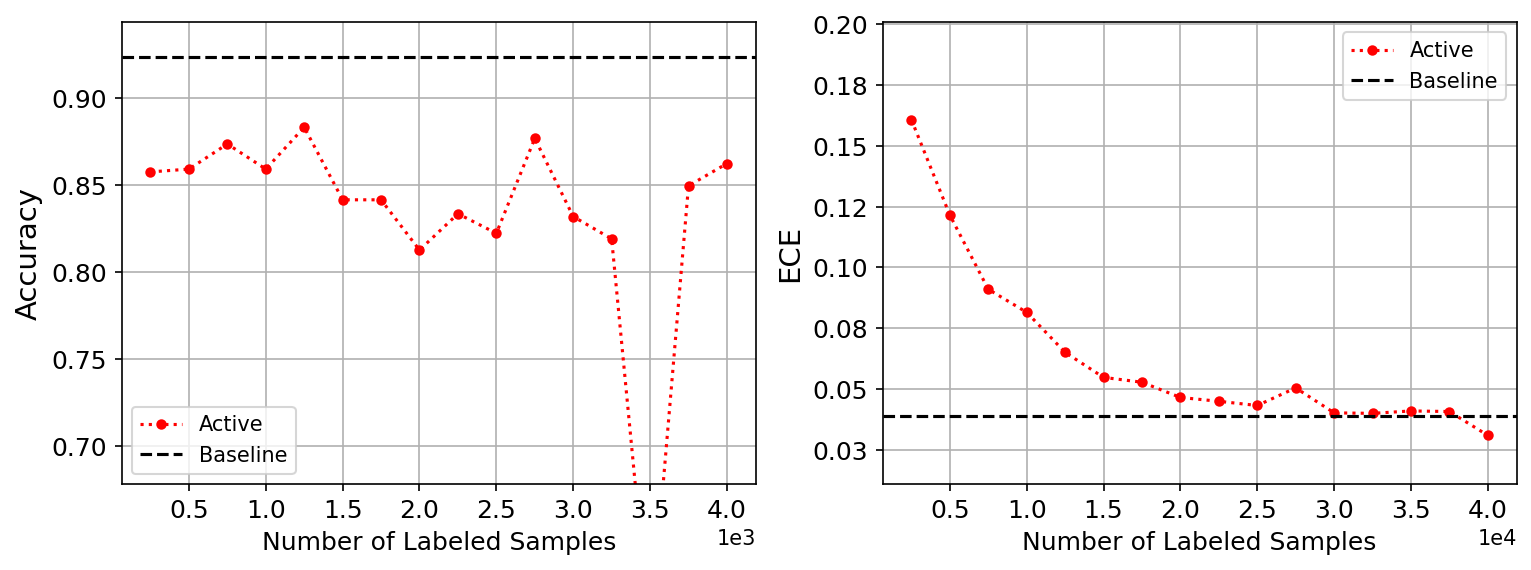

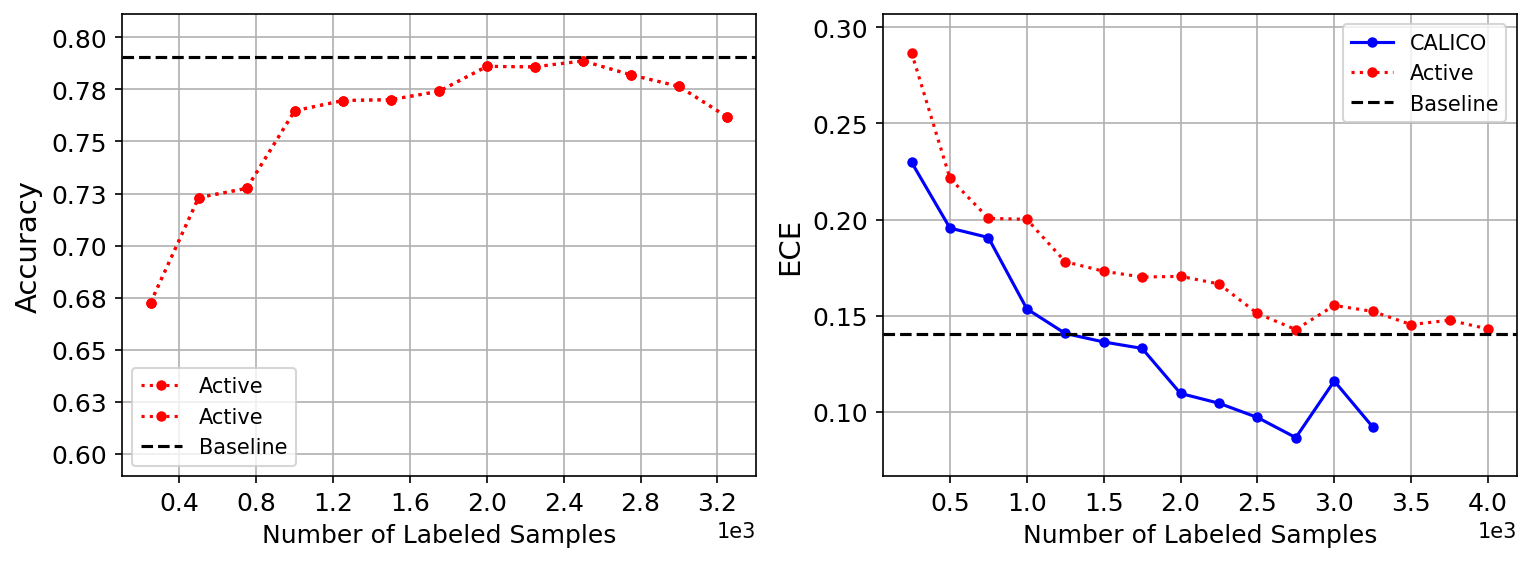

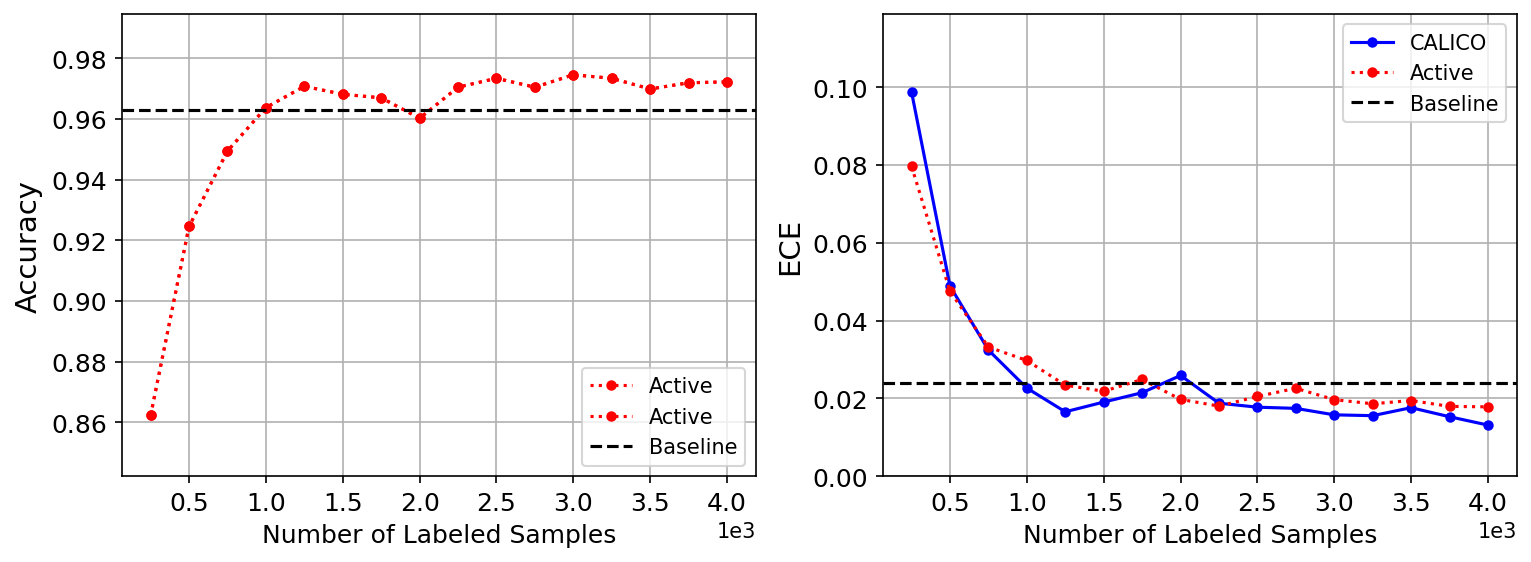

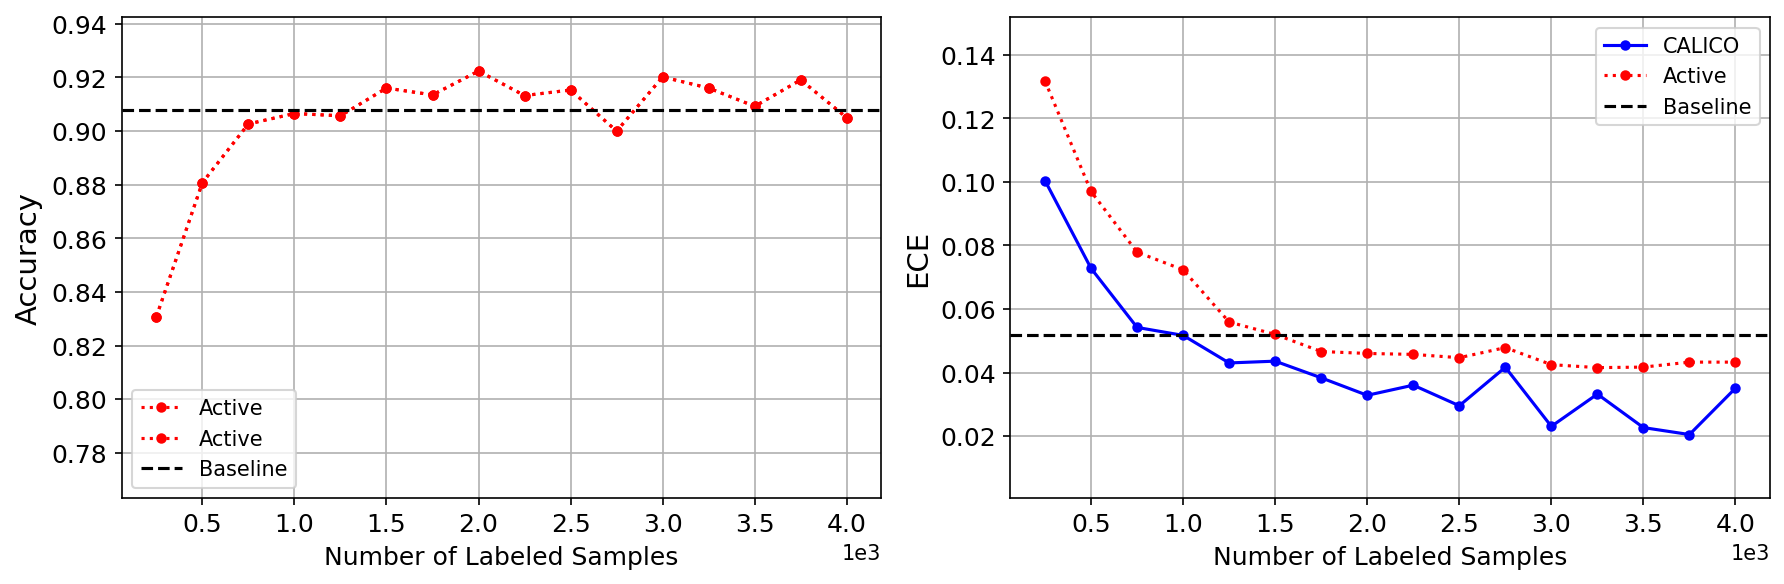

In [23]:
# Define the datasets and optimization methods
datasets = df["dataset"].unique()


# Iterate over the datasets
for i, dataset in enumerate(datasets):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=150)
    df_filtered = df[df["dataset"] == dataset]

    ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax2.xaxis.set_major_locator(plt.MaxNLocator(10))

    ax1.yaxis.set_major_formatter(FuncFormatter("{:.2f}".format))
    ax2.yaxis.set_major_formatter(FuncFormatter("{:.2f}".format))

    # format xtick labels as scientific notation
    ax1.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
    ax2.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))

    ax1.set_ylabel("Accuracy", fontsize=14)

    # check if df_filtered as active_jempp
    if "active-jempp" in df_filtered["exp_type"].unique():
        df_experiment_active_jempp = df_filtered[df_filtered["exp_type"] == "active-jempp"]
        ax1.plot(
            df_experiment_active_jempp["num_labeled"],
            df_experiment_active_jempp["test_acc"],  
            color="red",
            marker="o",
            linestyle="dotted",
            markersize=4,
            label="Active",
        )
        ax2.plot(
            df_experiment_active_jempp["num_labeled"],
            df_experiment_active_jempp["test_ece"],
            color="blue",
            marker="o",
            markersize=4,
            label="CALICO",
        )

    if "active-softmax" in df_filtered["exp_type"].unique():
        df_active_softmax = df_filtered[df_filtered["exp_type"] == "active-softmax"]
        ax1.plot(
            df_experiment_active_jempp["num_labeled"],
            df_experiment_active_jempp["test_acc"], 
            color="red",
            marker="o",
            linestyle="dotted",
            markersize=4,
            label="Active",
        )
        ax2.plot(
            df_active_softmax["num_labeled"],
            df_active_softmax["test_ece"],
            color="red",
            marker="o",
            linestyle="dotted",
            markersize=4,
            label="Active",
        )

    if "baseline-softmax" in df_filtered["exp_type"].unique():
        df_baseline = df_filtered[df_filtered["exp_type"] == "baseline-softmax"]
        ax1.axhline(
            df_baseline["test_acc"].values[0],
            color="black",
            linestyle="dashed",
            label="Baseline",
        )

        ax2.axhline(
            df_baseline["test_ece"].values[0],
            color="black",
            linestyle="dashed",
            label="Baseline",
        )

    min_y = df_filtered["test_acc"].min() - 0.02
    if min_y < 0:
        min_y = 0
    max_y = df_filtered["test_acc"].max() + 0.02
    ax1.set_ylim([min_y, max_y])

    min_y = df_filtered["test_ece"].min() - 0.02
    if min_y < 0:
        min_y = 0
    max_y = df_filtered["test_ece"].max() + 0.02
    ax2.set_ylim([min_y, max_y])

    ax2.set_xlabel("Number of Labeled Samples", fontsize=12)
    ax2.set_ylabel("ECE", fontsize=14)
    ax2.tick_params(axis="both", which="major", labelsize=12)
    ax2.legend(loc="best")
    ax2.grid()

    ax1.set_xlabel("Number of Labeled Samples", fontsize=12)
    ax1.set_ylabel("Accuracy", fontsize=14)
    ax1.tick_params(axis="both", which="major", labelsize=12)
    ax1.legend(loc="best")
    ax1.grid()
    print(f"Saving {dataset}")

plt.tight_layout()
plt.show()

Saving dermamnist
Saving pneumoniamnist
Saving cifar10
Saving organsmnist
Saving bloodmnist
Saving organcmnist


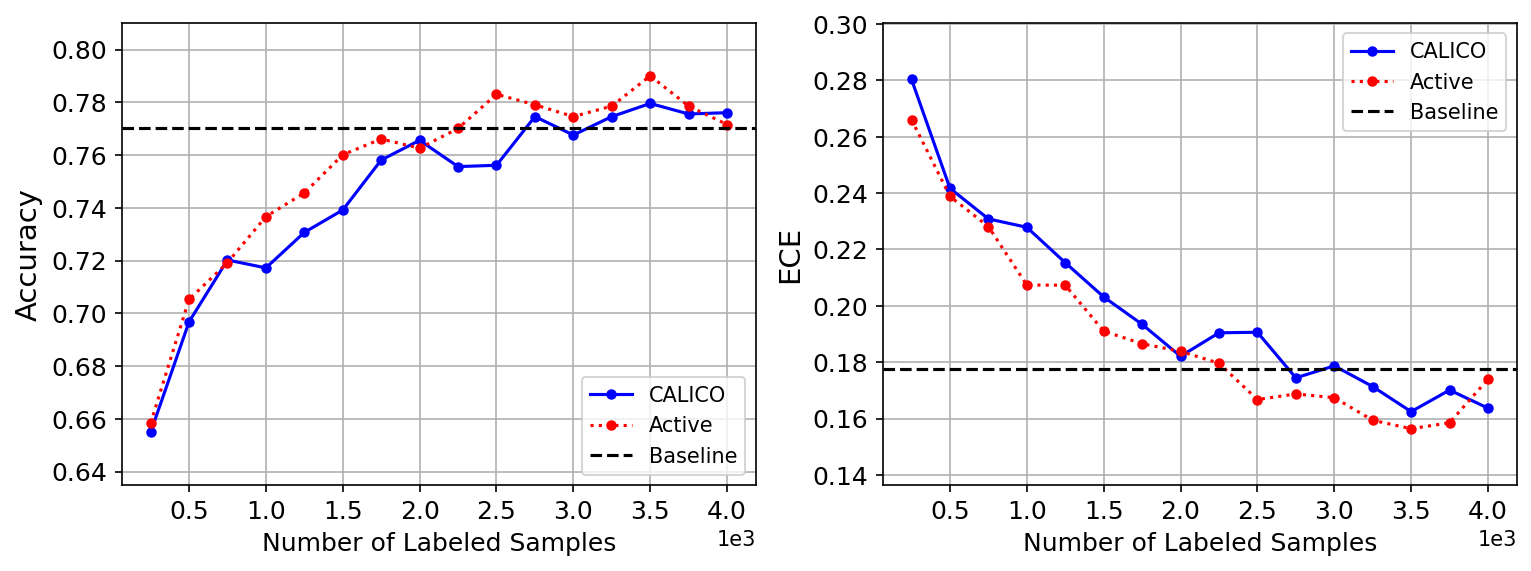

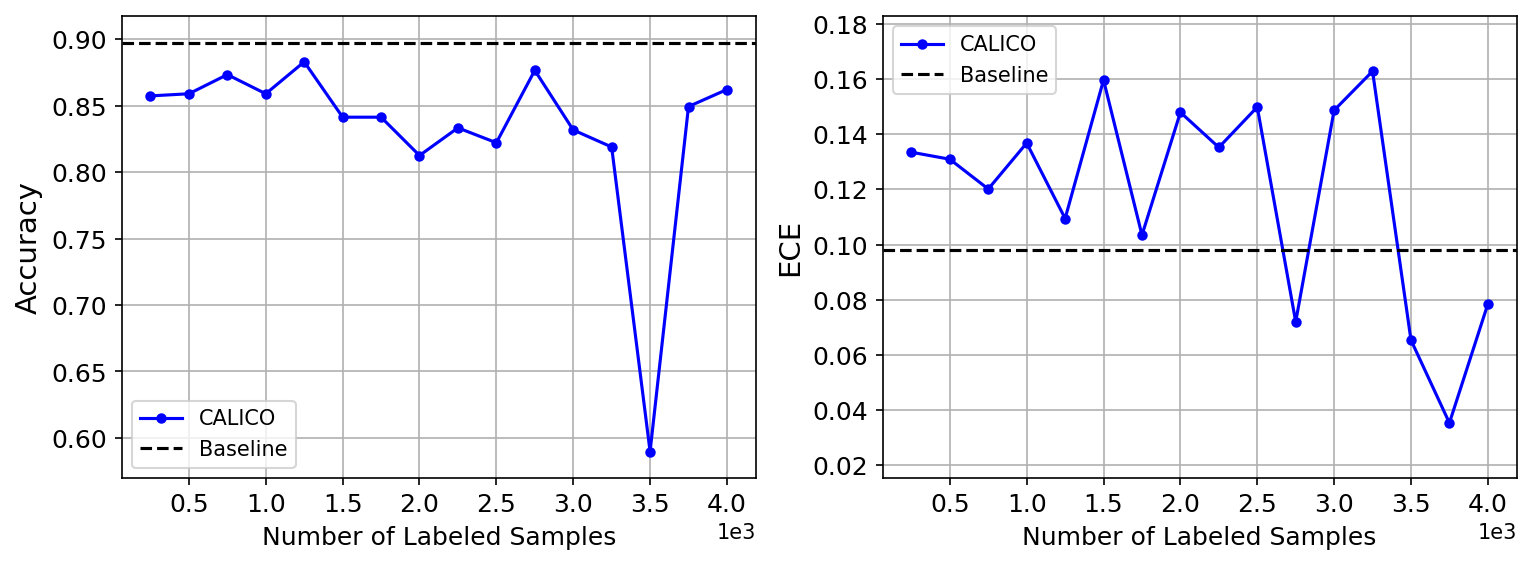

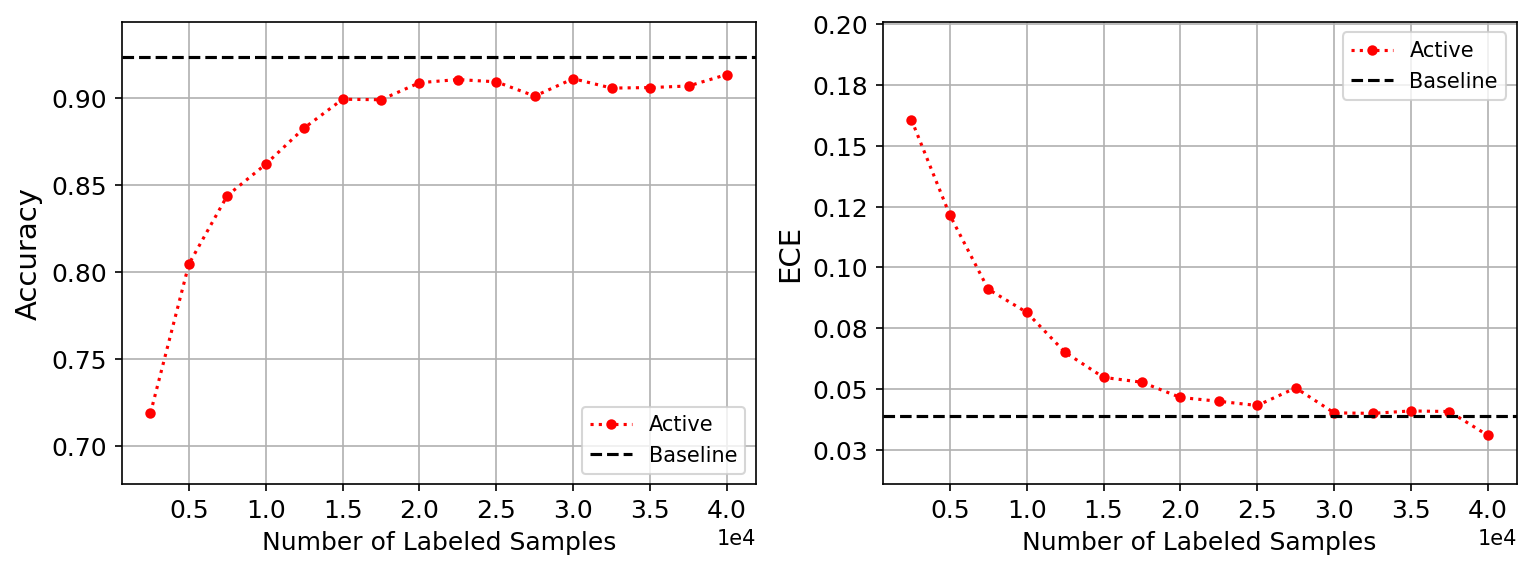

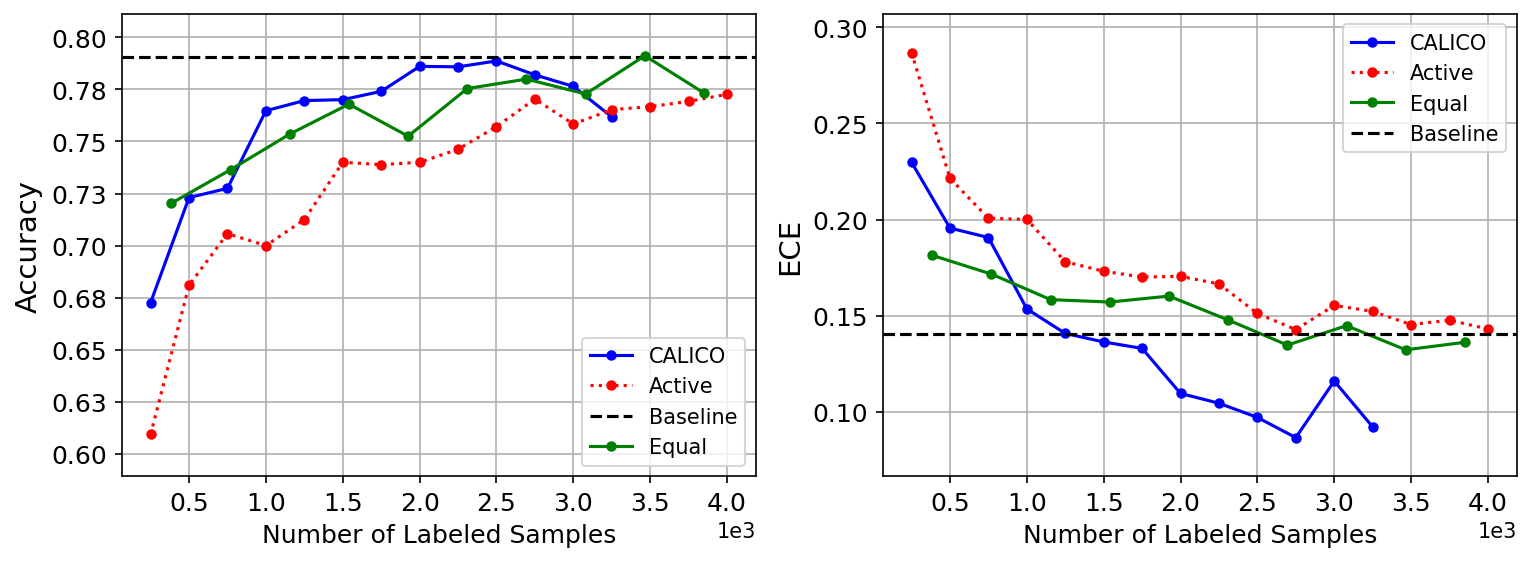

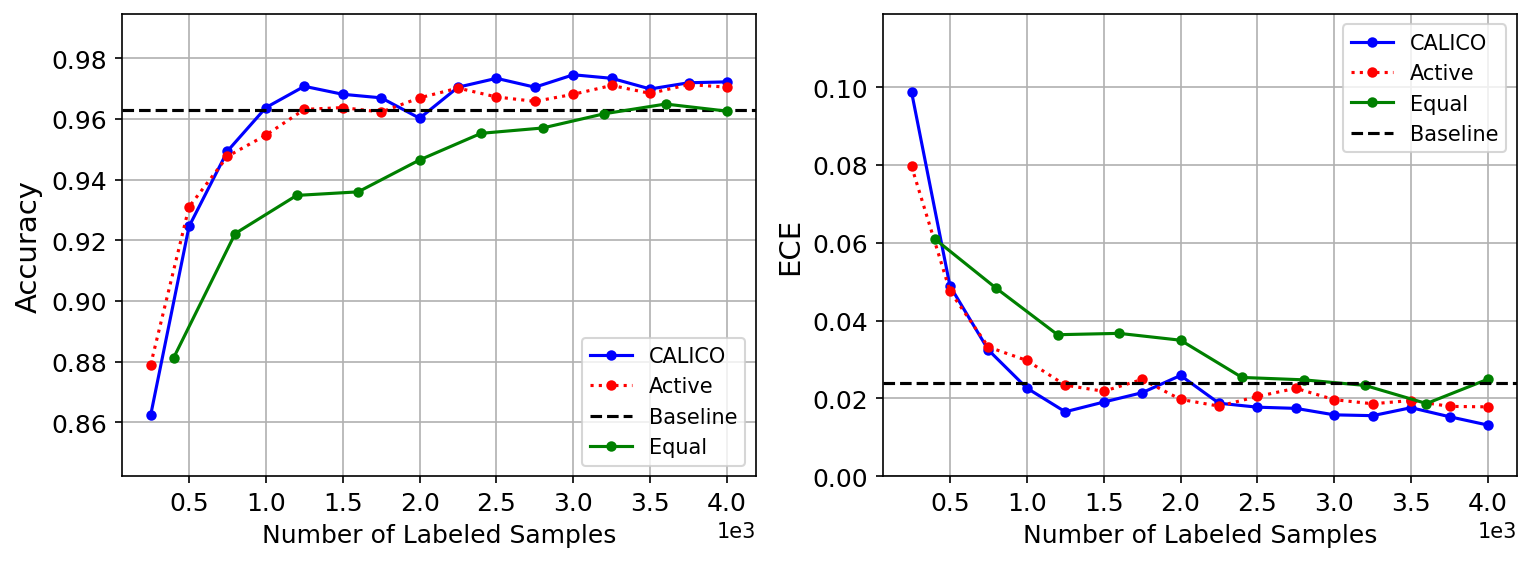

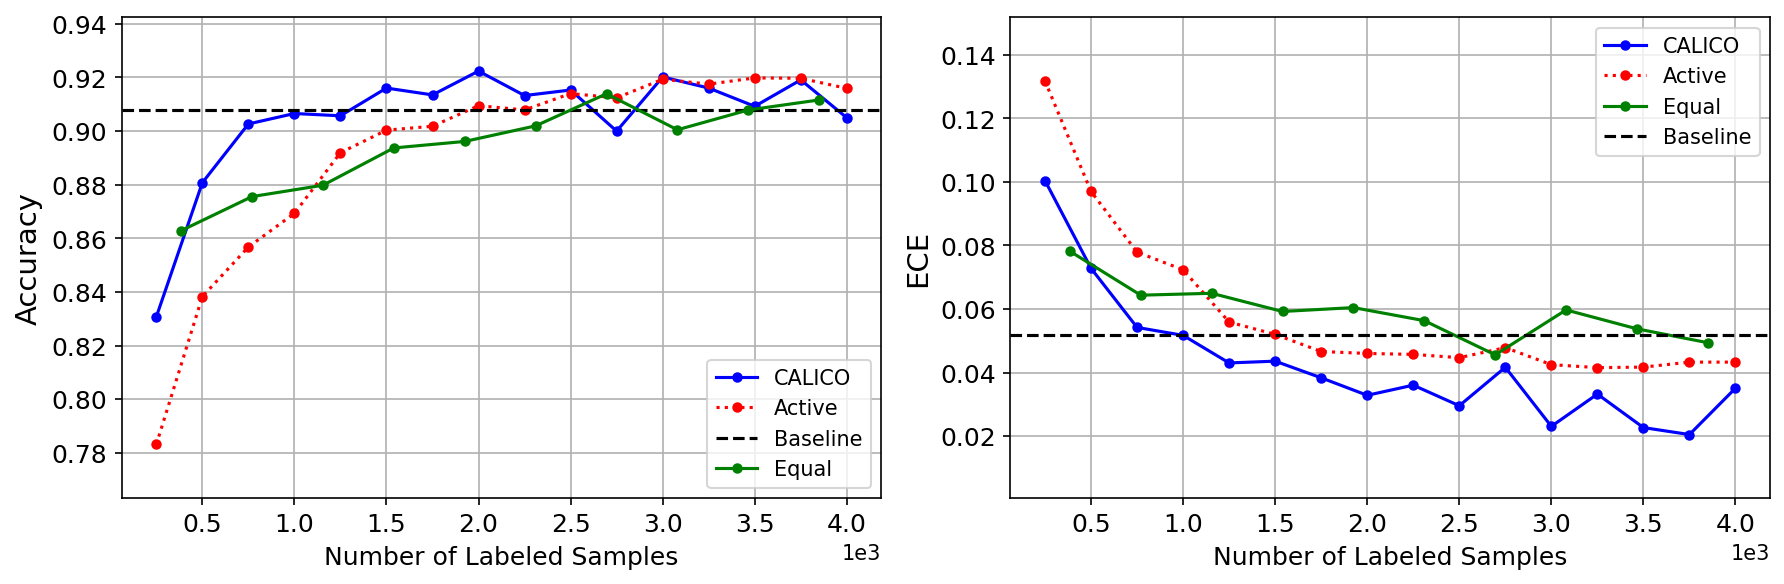

In [22]:
# Define the datasets and optimization methods
datasets = df["dataset"].unique()


# Iterate over the datasets
for i, dataset in enumerate(datasets):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=150)
    # Filter the data for the current dataset
    df_filtered = df[df["dataset"] == dataset]

    # plot the ece over num_labeled
    ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax2.xaxis.set_major_locator(plt.MaxNLocator(10))

    ax1.yaxis.set_major_formatter(FuncFormatter("{:.2f}".format))
    ax2.yaxis.set_major_formatter(FuncFormatter("{:.2f}".format))

    # format xtick labels as scientific notation
    ax1.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
    ax2.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))

    # Plot the accuracy on the first axes
    if "active-jempp" in df_filtered["exp_type"].unique():
        df_experiment_active_jempp = df_filtered[df_filtered["exp_type"] == "active-jempp"]
        ax1.plot(
            df_experiment_active_jempp["num_labeled"],
            df_experiment_active_jempp["test_acc"],  # replace with the correct column name for accuracy
            color="blue",
            marker="o",
            markersize=4,
            label="CALICO",
        )

    if "active-softmax" in df_filtered["exp_type"].unique():
        df_experiment_active_jempp = df_filtered[df_filtered["exp_type"] == "active-softmax"]
        ax1.plot(
            df_experiment_active_jempp["num_labeled"],
            df_experiment_active_jempp["test_acc"],  # replace with the correct column name for accuracy
            color="red",
            marker="o",
            linestyle="dotted",
            markersize=4,
            label="Active",
        )

    if "baseline-softmax" in df_filtered["exp_type"].unique():
        df_baseline = df_filtered[df_filtered["exp_type"] == "baseline-softmax"]
        ax1.axhline(
            df_baseline["test_acc"].values[0],
            color="black",
            linestyle="dashed",
            label="Baseline",
        )

    ax1.set_ylabel("Accuracy", fontsize=14)

    # check if df_filtered as active_jempp
    if "active-jempp" in df_filtered["exp_type"].unique():
        # Plot the ECE mean for the active calibrated and uncalibrated methods
        df_experiment_active_jempp = df_filtered[df_filtered["exp_type"] == "active-jempp"]

        ax2.plot(
            df_experiment_active_jempp["num_labeled"],
            df_experiment_active_jempp["test_ece"],
            color="blue",
            marker="o",
            markersize=4,
            label="CALICO",
        )

    if "active-softmax" in df_filtered["exp_type"].unique():
        df_active_softmax = df_filtered[df_filtered["exp_type"] == "active-softmax"]
        ax2.plot(
            df_active_softmax["num_labeled"],
            df_active_softmax["test_ece"],
            color="red",
            marker="o",
            linestyle="dotted",
            markersize=4,
            label="Active",
        )

    if "equal-jempp" in df_filtered["exp_type"].unique():
        df_experiment_active_jempp = df_filtered[df_filtered["exp_type"] == "equal-jempp"]
        ax1.plot(
            df_experiment_active_jempp["num_labeled"],
            df_experiment_active_jempp["test_acc"],  # replace with the correct column name for accuracy
            color="green",
            marker="o",
            markersize=4,
            label="Equal",
        )
        ax2.plot(
            df_experiment_active_jempp["num_labeled"],
            df_experiment_active_jempp["test_ece"],
            color="green",
            marker="o",
            markersize=4,
            label="Equal",
        )

    if "baseline-softmax" in df_filtered["exp_type"].unique():
        df_baseline = df_filtered[df_filtered["exp_type"] == "baseline-softmax"]
        ax2.axhline(
            df_baseline["test_ece"].values[0],
            color="black",
            linestyle="dashed",
            label="Baseline",
        )

    # set min and max y limits for accuracy (0.2 above and below the min and max values), if min goes below 0, set to 0
    min_y = df_filtered["test_acc"].min() - 0.02
    if min_y < 0:
        min_y = 0
    max_y = df_filtered["test_acc"].max() + 0.02
    ax1.set_ylim([min_y, max_y])
    
    # Set min and max y limits (0.2 above and below the min and max values), if min goes below 0, set to 0
    min_y = df_filtered["test_ece"].min() - 0.02
    if min_y < 0:
        min_y = 0
    max_y = df_filtered["test_ece"].max() + 0.02
    ax2.set_ylim([min_y, max_y])

    ax2.set_xlabel("Number of Labeled Samples", fontsize=12)
    ax2.set_ylabel("ECE", fontsize=14)
    ax2.tick_params(axis="both", which="major", labelsize=12)
    ax2.legend(loc="best")
    ax2.grid()

    ax1.set_xlabel("Number of Labeled Samples", fontsize=12)
    ax1.set_ylabel("Accuracy", fontsize=14)
    ax1.tick_params(axis="both", which="major", labelsize=12)
    ax1.legend(loc="best")
    ax1.grid()
    print(f"Saving {dataset}")

plt.tight_layout()
plt.show()